# WRF

Results from [WRF](https://www2.mmm.ucar.edu/wrf/) Weather Research & Forecasting Model using the [WRFV3 benchmarks](https://www2.mmm.ucar.edu/wrf/WG2/benchv3/).

In [35]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, display_markdown

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../../reframe', '../../')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The benchmark is run on a range of nodes using as many processes as there are physical cores on each node. The plots show results for the most-recent run on each system/partition/environment combination. They show:
- `runtime_real` (s): Wallclock time for the entire MPI job.
- `av_time_per_step`: TODO

Lower values are better performance. 

### WRF_12km_run*: runtime_real

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,58.411,58.506
2,36.265,36.001
4,28.497,31.195
8,22.026,84.382
16,20.793,83.448
32,20.779,20.804
56,19.840,25.801


### WRF_12km_run*: gflops

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,100.397886,100.406394
2,210.035788,210.317209
4,391.198553,392.185821
8,754.687962,726.488574
16,1053.685589,925.231749
32,1449.953107,1126.499079
56,1453.407510,1056.138348


### WRF_2_5km_run*: runtime_real

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,2863.610,2861.413
2,1508.927,1500.575
8,480.197,694.293
16,317.552,1044.076
32,231.637,1285.409
56,203.682,NaN


### WRF_2_5km_run*: gflops

case,csd3:cclake-ib-icc19-impi19-ucx,csd3:cclake-roce-icc19-impi19-ucx
num_nodes,,
1,7.914695,7.915084
2,15.669416,15.712592
8,60.988416,58.005045
16,113.127322,24.200100
32,230.486264,18.941522
56,365.479521,NaN


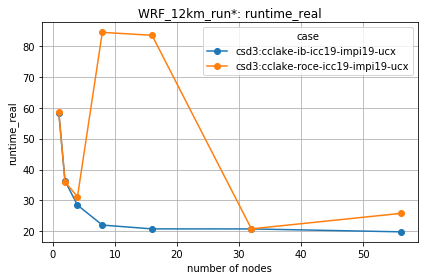

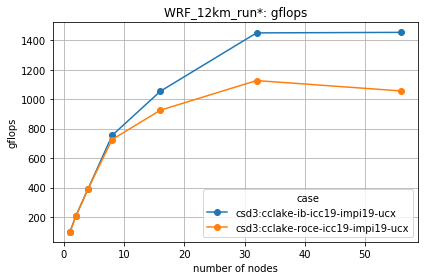

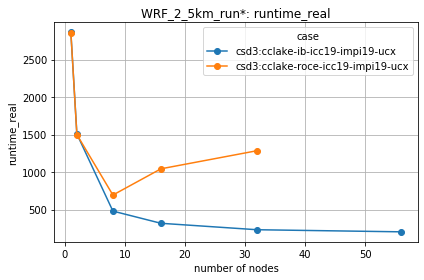

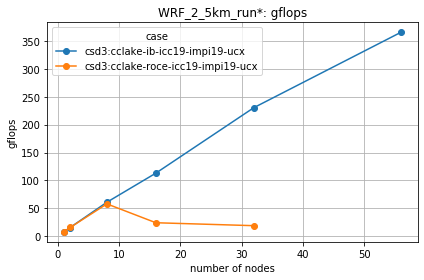

In [40]:
for test in ['WRF_12km_run*', 'WRF_2_5km_run*']:
    for var in ['runtime_real', 'gflops']:
        df = modules.utils.tabulate_last_perf(test, 'num_nodes', var)
        if df is None:
            print('%s: no data found' % var)
            continue
        title = '%s: %s' % (test, var)
        display_markdown('### %s' % title, raw=True)
        display(df)
        ax = df.plot(grid=True, style='o-')
        ax.set_xlabel('number of nodes')
        ax.set_ylabel(var)
        ax.set_title(title)
        plt.tight_layout()